# ETSMP-01 Stochastic Modeling and Processing exam
__Date__: 18th of June 2021  
__Student__: Felix Blix Everberg  
__au ID__: au482985  
__Student number__: 201371008  
All calculations are done using sagemath ([www.sagemath.org](https://www.sagemath.org)) in a jupyter notebook, with the source code included.  


## Preamble
The below code is defined as a utility to simplify the solutions

In [10]:
%display latex
%matplotlib notebook
import traceback
def show_var(*names, approx=True, debug=False):
    if len(names) == 0:
        # First extract the line of source code where this was called
        source = traceback.extract_stack(limit=2)[0].line
        # Check if call was from a line starting with an assignment:
        if source.count('=') < 1:
            raise SyntaxError('The show_var() function can only be used on lines where a variable is assigned')
        # Then extract the variable name assigned to
        names = [name.strip() for name in source.split('=')[0].split(',')]
    for name in names:
        value = globals()[name]
        expr = LatexExpr(f'\\text{{{name}}} = ') + latex(value)
        if approx:
            try:
                approx = n(value, digits=3)
                if value != approx:
                    expr += LatexExpr(f'\\sim') + latex(approx)
                elif parent(value) is QQ and not _can_convert_to_ZZ(value):
                    expr += LatexExpr(f'= {RR(approx).str(truncate=True, skip_zeroes=True)}')
                elif value.base_ring() is QQ and not _can_convert_to_ZZ(value):
                    expr += LatexExpr('=') + latex(approx)
            except Exception as e:
                if debug:
                    traceback.print_exc()
        show(expr)

## Problem 1:   Probability theory

Calling the event of and Error E, and reffering to the three positions with their respective letter, the given information can be formalized as:  
$P(A | E) = 0.22$  
$P(B | E) = 0.46$  
$P(A) = P(B) = P(C) = \frac 1 3$  
$P(E) = 0.14$  

### a)

Since the product is always in either position A, B or C ($ S = \left\{A, B, C\right\}$), then  
$P(C|E) = 1 - P(B|E) - P(A|E) = 1 - 0.46 - 0.22 = 0.32$

### b)

This probability is the total probability of event B and E, which can be found from the known conditional probability of B given E using the rule of multiplication:  
$ P(B \cap E) = P(B | E) P(E) = 0.46 \cdot 0.14 = 0.0644 $

### c)

Given that an event and it's complement always partitions it's domain  
$P\left(\bar E | A\right) = 1  -  P(E | A) = 1 - \dfrac{P(E \cap A)}{P(A)}$  
Using the same method as above to determine the intersection of A and E:  
$ P(E \cap A) = P(A | E) P(E) = 0.22 \cdot 0.14 = 0.0308 $  
And substituting in the values:  
$P\left(\bar E | A\right) = 1 - \dfrac{0.0308}{0.3333} = 1 - 0.0924 = 0.9076$


## Problem 2:  Stochastic Variables

In [3]:
var('Pr_minus1_1, Pr_5_1')
X_table = [-2,-1, 0, 1, 2]
Y_table = [1, 3, 5]
# The given table is transposed to be row first XY pmf
f_XY_table = [[       0.12, 0.04,   0.04],
              [Pr_minus1_1, 0.12,   0.04],
              [       0.00, 0.20,   0.00],
              [       0.08, 0.04, Pr_5_1],
              [       0.08, 0.08,   0.04]]

### a)

In order to fill out the missing probabilities in the joint pmf table, the given probability of $P(Y = 1) = 0.32$ is first used, to find $f_{XY}(-1, 1)$ by solving for the sum of the row for $Y = 1$:

In [4]:
f_XY_table[1][0] = Pr_minus1_1 = solve(sum([r[0] for r in f_XY_table]) == 0.32, Pr_minus1_1)[0].rhs()
show_var('Pr_minus1_1')

\text{Pr_minus1_1} = \frac{1}{25}

With only one cell missing in the joint pmf table, the final value is determined so that the table sums to 1

In [5]:
f_XY_table[3][2] = Pr_5_1 = solve(sum([sum(r) for r in f_XY_table]) == 1, Pr_5_1)[0].rhs()
show_var('Pr_5_1')

\text{Pr_5_1} = \frac{2}{25}

Leading to the following full joint pmf:

In [6]:
show_var('f_XY_table')

\text{f_XY_table} = \left[\left[0.120000000000000, 0.0400000000000000, 0.0400000000000000\right], \left[\frac{1}{25}, 0.120000000000000, 0.0400000000000000\right], \left[0.000000000000000, 0.200000000000000, 0.000000000000000\right], \left[0.0800000000000000, 0.0400000000000000, \frac{2}{25}\right], \left[0.0800000000000000, 0.0800000000000000, 0.0400000000000000\right]\right]

### b)

In order to determine the marginal pmf's, the joint pmf is first summed along it's rows, then along it's columns:

In [7]:
f_X_table = [sum(row) for row in f_XY_table]; show_var()
f_Y_table = [sum(column) for column in zip(*f_XY_table)]; show_var()

\text{f_X_table} = \left[0.200000000000000, 0.200000000000000, 0.200000000000000, 0.200000000000000, 0.200000000000000\right]

\text{f_Y_table} = \left[0.320000000000000, 0.480000000000000, 0.200000000000000\right]

### c)

The means and variances are determined from the marginal pmf's as follows:  
$ EX = \sum_x x\,f_X(x) $

In [8]:
EX = sum([x*fx for x, fx in zip(X_table, f_X_table)]); show_var()
EY = sum([y*fy for y, fy in zip(Y_table, f_Y_table)]); show_var()

\text{EX} = -5.55111512312578 \times 10^{-17}

\text{EY} = 2.76000000000000

and then the variance  
$ Var(X) = E\left(X^2\right) - EX^2 $  
Using the same method as above to find $ E\left(X^2\right)$

In [9]:
VarX = sum([x^2*fx for x, fx in zip(X_table, f_X_table)]) - EX^2; show_var()
VarY = sum([y^2*fy for y, fy in zip(Y_table, f_Y_table)]) - EY^2; show_var()

\text{VarX} = 2.00000000000000

\text{VarY} = 2.02240000000000

### d)

Using the fact that  
$P(X=-1 | Y = 3) = \dfrac{P(X=-1 \cap Y = 3)}{P(Y=3)}$  
and then using the joint and marginal pmfs this can be rewritten  
$P(X=-1 | Y = 3) = \dfrac{f_{XY}(-1, 3)}{f_Y(3)}$ 

In [10]:
Pr_minus1_3 = f_XY_table[1][1]/f_Y_table[1]; show_var()

\text{Pr_minus1_3} = 0.250000000000000

## Problem 3:  Stochastic processes

### a)

In order to synthesize realizations of the described process, the relevant distribution classes from scipy.stats are used:

<IPython.core.display.Javascript object>


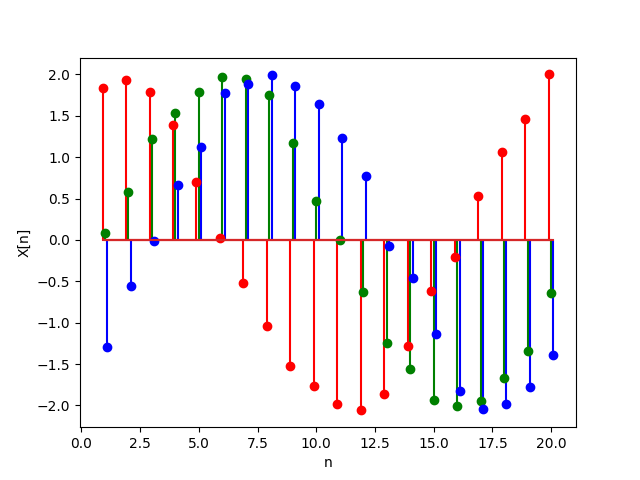

In [2]:
%matplotlib notebook
import scipy.stats
import matplotlib.pyplot as plt

def realization_of_X(n):
    sample_len = len(n)
    phi = scipy.stats.uniform.rvs(-pi, pi)
    W = scipy.stats.norm.rvs(0, 0.1, sample_len)
    return [2*cos(n*pi/10 + phi) + W[i] for i, n in enumerate(n)]

num_realizations = 3
_n = range(1, 21)
realizations = [realization_of_X(_n) for _ in range(num_realizations)]

offset = 0.1
fmt = ['r', 'g', 'b']
fig, ax = plt.subplots()
for i in range(num_realizations):
    ax.stem([-offset + i*offset + n for n in _n], realizations[i], fmt[i], fmt[i]+'o')
    ax.set_xlabel('n')
    ax.set_ylabel('X[n]')
fig.show()

### b)

In order to calculate the ensemble mean and variance, standard algebraic rules for mean and variances are applied to the formula for the process:  
$E(X[n]) = E\left(2 \cdot \text{cos}\left(\frac{\pi}{10}\cdot n + \phi\right) + W[n]\right) = 2\cdot E\left(\text{cos}\left(\frac{\pi}{10}\cdot n + \phi\right)\right) + E\left(W[n]\right) = 2 \cdot 0 + 0 = 0$  
$\text{Var}(X[n]) = \text{Var}\left(2 \cdot \text{cos}\left(\frac{\pi}{10}\cdot n + \phi\right) + W[n]\right) = 
2^2 \cdot \text{Var}\left(\text{cos}\left(\frac{\pi}{10}\cdot n + \phi\right)\right) + \text{Var}\left(W[n]\right)$  
Since the variance of the cosine is unaffected by the phase change, the variance of the sine can be found as follows:

In [27]:
var('x')
n(integral(cos(pi/10*x)^2, x, 0, 2*pi))

2.56728534357493

Resulting in  
$\text{Var}(X[n]) = 2^2 \cdot 2.56728534357493 + 0.1 = 10.3691413742997$  

### c)

Since the mean and variance doesn't change with time, __the process is WSS__.  
Since the phase change introduced by phi doesn't change neither the mean nor the variance, these will be the same for any realization sampled over a sufficiently long time, and __the process is ergodic__.

## Problem 4:  Statistics

In [8]:
num_cars = [160, 142, 118, 155, 100, 127, 93, 163, 136, 169, 102, 109]

### a)

Since the subject is examined is the number of spontaneous events per unit of time, a Poisson distribution is a fitting choice.

### b)

The estimated rate is found as:  
$\hat \lambda = \frac x t$  
where x is the number of events (cars arriving at the intersection in this case), and t is the duration of the observation.  
Using cars per minute as the unit for the rate, the rates of each interval as well as the overall rate is:  

In [14]:
rates = [x/5 for x in num_cars]; show_var()
total_rate = sum(num_cars)/60; show_var()
n(total_rate)

\text{rates} = \left[32, \frac{142}{5}, \frac{118}{5}, 31, 20, \frac{127}{5}, \frac{93}{5}, \frac{163}{5}, \frac{136}{5}, \frac{169}{5}, \frac{102}{5}, \frac{109}{5}\right]

\text{total_rate} = \frac{787}{30}

26.2333333333333

### c)

Given that the experimenters had an expected rate of cars, this is used for the null hypothesis:  
$H_0\text{:}\quad \lambda = 25$  
$H_1\text{:}\quad \lambda \ne 25$

### d)

For a test statistic, the deviation of the observation from the expected mean should be normalized by the (expected) standard deviation of the data. For the poisson distribution this leads to:  
$z = \dfrac{x-t\cdot \lambda}{\sqrt{t\cdot\lambda}}$

In [12]:
z = (sum(num_cars) - (60 * 25)) / sqrt(60*25); show_var()

\text{z} = \frac{37}{75} \, \sqrt{15} \sim 1.91

Using a normal distribution, the pvalue can be approximated as:

In [17]:
p_val = 2*(1 - scipy.stats.norm.cdf(float(abs(z)))); show_var()

\text{p_val} = 0.05604677300770544 \sim 0.0560

### e)

Again using the normal approximation, we get  
$\lambda_{\pm} = \frac 1 t \left[x + \frac {u^2}{2} \pm u\cdot \sqrt{x+\frac{u^2}{4}}\right]$  
where $u = \Phi^{-1}\left(1-\frac{\alpha}2\right)$

In [20]:
u = scipy.stats.norm.ppf(1-0.05/2)
x = sum(num_cars)
lambda_plus = (x + u^2/2 + u*sqrt(x+u^2/4))/60; show_var()
lambda_minus = (x + u^2/2 - u*sqrt(x+u^2/4))/60; show_var()

\text{lambda_plus} = 27.561723498449567 \sim 27.6

\text{lambda_minus} = 24.968967481895337 \sim 25.0

### f)

Based on both the p-value and the confidence interval, the null hypothesis cannot be rejected and with 95% confidence, the assumption of 25 cars per minute is reasonable.